# Instruções

Esse documento é um [Jupyter notebook](http://jupyter.org/), um documento interativo que mistura texto (como esse), código (como abaixo), e o resultado de executar o código (números, texto, figuras, videos, etc).

O notebook te fornecerá exemplos interativos que trabalham o tema abordado.

As células com números ao lado, como `In [1]:`, são código [Python](https://www.python.org/). Algumas dessas células não produzem resultado e servem de preparação para os exemplos interativos. Outras, produzem gráficos interativos. **Você deve executar todas as células, uma de cada vez**, mesmo as que não produzem gráficos.

**Para executar uma célula**, clique em cima dela e aperte `SHIFT+ENTER` ou presione o botão de *Run* (<button class='fa fa-play icon-play btn btn-xs btn-default'></button>) na barra de ferramentas acima.  O foco (contorno verde ou cinza em torno da célula) deverá passar para a célula abaixo. Para rodá-la, aperte `SHIFT+ENTER` novamente e assim por diante. Você pode executar células de texto que não acontecerá nada.

# Por que usar Jupyter Notebook? 
Veja o artigo [Interactive notebooks: Sharing the code](http://www.nature.com/polopoly_fs/1.16261!/menu/main/topColumns/topLeftColumn/pdf/515151a.pdf) da revista nature

#### Autor:
* Dr. Oscar Fabian Mojica Ladino ([@ofmla](https://github.com/ofmla))

## _Setup_

Rode as células abaixo para carregar os módulos necessários para essa prática.

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
print(sys.version)
np.__version__
%matplotlib inline

3.9.1 (default, Dec 11 2020, 14:32:07) 
[GCC 7.3.0]


### Criação de suas próprias funções
Podemos combinar operações para avaliar equações complexas. Considere o valor da equação ```x^3 - log(x)``` para o valor ```x = 3```

In [2]:
x = 3
print(x**3 - np.log(x))

25.90138771133189


Seria tedioso digitar isso todas as vezes. A seguir, aprendemos como expressar esta equação como uma nova função, que podemos chamar com diferentes
valores

As funções em Python são definidas usando a seguinte convenção:
```
def function (arg1, arg2, ...):
    statements
    return return_values
```
onde ```arg1, arg2, ...``` são os argumentos da função. Os argumentos podem ser quaisquer objetos Python e até outras funções. Eles podem receber valores padrão, o que torna o uso do argumento opcional.

In [3]:
def f(x):
    return x**3 - np.log(x)

print(f(3))
print(f(5.1))

25.90138771133189
131.0217594602697


In [4]:
def func(x, y):
    "return product of x and y"
    return x * y

print(func(2,7))
#print(func([2,3],[4,5]))

14


Observe que a função não é vetorizada automaticamente. É por isso que nós veja o erro acima. Existem algumas maneiras de fazer isso. Um é fazer um _cast_ das variáveis de entrada para objetos que suportam operações vetorizadas, como objetos ```numpy.array```.

In [5]:
print(func(np.array([2, 3]), np.array([3, 4])))

[ 6 12]


### Descrição do Problema:

Ajustaremos os dados de pressão de vapor do benzeno a um polinômio e, em seguida, realizaremos uma regressão linear dos dados usando a equação de Clausius Claperyon e a equação de Antoine. Ambos são equações correlacionadas que foram usadas para ajustar os dados de pressão de vapor para vários compostos. Este é o Problema 3 no [conjunto de problemas ASEE 1997](http://www.polymath-software.com/ASEE/Tenprobs.pdf)

### Dados e equações:

#### Dados de pressão de vapor para benzeno
 
| Temperatura, T (C) | Presão, P (mm Hg) |
|:------------------:|:-----------------:|
|-36.7 | 1 |
|-19.6 | 5 |
|-11.5 |10 | 
|-2.6 |20 |
|+7.6 |40 |
|15.4 |60 |
|26.1 |100 |
|42.2 |200 |
|60.6 |400 |
|80.1 |760 |

#### Expressão Polinomial Geral

```P(x) = a0 + a1*x + a2*x2 + a3*x3 +. . . + an*xa```

```a0``` a ```an``` são os coeficientes calculados por um ajuste de mínimos quadrados de um grau selecionado ```n``` do polinômio

#### Equação de Clausius Clapeyron

log (P) = A + B / T

```T``` = Temperatura Absoluta em graus K e ```A``` e ```B``` são parâmetros que são determinados a partir de um ajuste de mínimos quadrados dos dados transformados

#### Equação de Antoine

log (P) = A - B / (C + T)

```T``` = Temperatura Absoluta em graus K e ```A, B``` e ```C``` são parâmetros que são determinados a partir de uma regressão não linear dos dados transformados.

### Solução

In [6]:
my_csv = np.genfromtxt('./data.txt', delimiter=' ')
temperature, pressure = my_csv.transpose()
print(temperature, pressure)
print(type(temperature),temperature.shape,temperature.size)

[-36.7 -19.6 -11.5  -2.6   7.6  15.4  26.1  42.2  60.6  80.1] [  1.   5.  10.  20.  40.  60. 100. 200. 400. 760.]
<class 'numpy.ndarray'> (10,) 10


In [7]:
z1 = np.polyfit(temperature, pressure, 1)
z1

array([ 5.89071959, 64.40597148])

In [8]:
z2 = np.polyfit(temperature, pressure, 2)
z2

array([ 0.08615257,  2.06714795, -0.58206463])

In [9]:
z3 = np.polyfit(temperature, pressure, 3)
z3

array([7.44911230e-04, 3.94480731e-02, 1.19809939e+00, 2.44593587e+01])

É conveniente usar objetos [poly1d](https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html#numpy.poly1d) para lidar com polinômios:

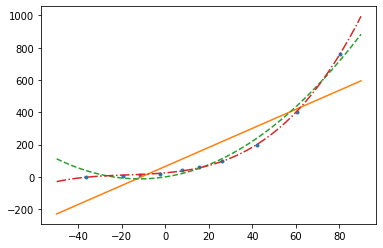

In [10]:
p1 = np.poly1d(z1)
p2 = np.poly1d(z2)
p3 = np.poly1d(z3)
xp = np.linspace(-50.,90,100)
plt.plot(temperature, pressure, '.', xp, p1(xp), '-', xp, p2(xp), '--', xp, p3(xp), '-.' )
plt.show()

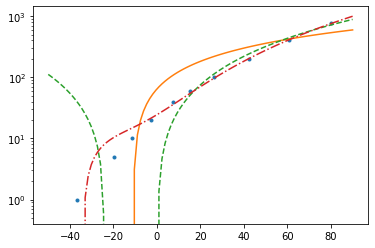

In [11]:
plt.yscale('log')
plt.plot(temperature, pressure, '.', xp, p1(xp), '-', xp, p2(xp), '--', xp, p3(xp), '-.' )
plt.show()

#### Equação de Clausius Clapeyron

Agora tentemos ajustar a equação de Clausius Clapeyron (CC) aos dados.

A primeira etapa é transformar os dados, começando com as pressões de vapor

In [12]:
p = np.log10(pressure)
print(p)

[0.         0.69897    1.         1.30103    1.60205999 1.77815125
 2.         2.30103    2.60205999 2.88081359]


e agora para as temperaturas.

In [13]:
t = 1/(temperature+273.15)
print(t)

[0.00422922 0.003944   0.0038219  0.00369617 0.00356189 0.0034656
 0.00334169 0.00317108 0.00299625 0.00283086]


Agora estamos prontos para ajustar os dados transformados

In [14]:
cc = np.polyfit(t, p, 1)
cc

array([-2035.33102614,     8.75200997])

In [15]:
pcc = np.poly1d(cc)
xp = np.linspace(-50.,90,100)
xpcc = 1/(xp+273.15)

Agora podemos exibir este novo resultado junto com os dados.

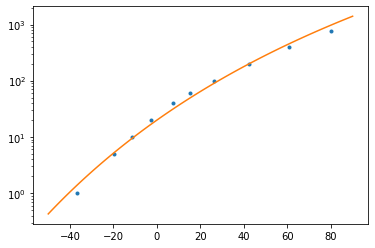

In [16]:
plt.yscale('log')
plt.plot(temperature, pressure, '.', xp, 10**(pcc(xpcc)), '-')
plt.show()

A partir disso, vemos imediatamente que a forma de Clausius Clapeyron é muito superior aos ajustes polinomiais simples.

#### Equação de Antoine

Outra equação popular usada para ajustar os dados de pressão de vapor é a equação de Antoine.


A equação de Antoine é convertida em uma equação linearizada.
```
log(P) = A - B / ( T + C )
T.log(P) + C.log(P) = A.T + A.C - B
log(P) = A + (A.C-B)/T - C.log(P)/T
y = a0 + a1.x1 + a2.x2
```

Definimos novas variáveis de temperatura e pressão como foi feito para a equação de Clausius-Clapeyron.

In [17]:
p = np.log10(pressure)
t = 1/(temperature+273.15)

Devemos também definir a variável combinada:

In [18]:
tau = p*t

Agora estamos prontos para ajustar os dados transformados

In [19]:
from sklearn import linear_model
X= np.vstack((t, tau)).T
print(X)

[[0.00422922 0.        ]
 [0.003944   0.00275673]
 [0.0038219  0.0038219 ]
 [0.00369617 0.00480883]
 [0.00356189 0.00570636]
 [0.0034656  0.00616237]
 [0.00334169 0.00668338]
 [0.00317108 0.00729675]
 [0.00299625 0.00779643]
 [0.00283086 0.00815517]]


In [20]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, p)

LinearRegression()

In [21]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 5.72975279621548
Coefficients: 
 [-1356.47245562   120.75481614]


In [22]:
a0 = regr.intercept_
a1 = regr.intercept_*(-1*regr.coef_[1]) - regr.coef_[0]
a2 = -1*regr.coef_[-1]
print(a0,a1,a2)

5.72975279621548 664.5772101959999 -120.75481613900617


Nas próximas linhas, reconstruímos a equação de Antoine em termos das variáveis originais:

In [23]:
xp = np.linspace(-50.,90,100)
xpa = 1/(xp+a2+273.15)
xpa =np.array([10**(a0-(a1*x)) for x in xpa])

e exibimos este novo resultado junto com a equação de Clausius-Clapeyron e os dados.

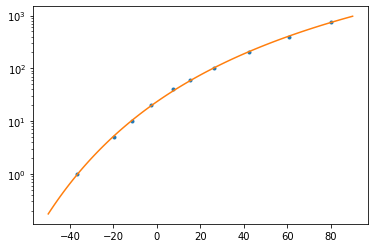

In [24]:
plt.yscale('log')
plt.plot(temperature, pressure, '.', xp, xpa, '-')
plt.show()